In [1]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense ,Dropout, Bidirectional, Reshape
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
from neural_network_functions import *

In [2]:
df = pd.read_csv('dataset_days.csv', sep=',', index_col="time")
df.head()

Среднняя t  Минимальная t  Максимальная t  Суточная сумма осадков  \
time                                                                            
2019-05-24        13.6            8.9            17.5                     0.0   
2019-05-25        15.6           11.8            18.9                     0.3   
2019-05-26        18.1           14.3            23.6                     0.0   
2019-05-27        16.7           12.5            21.2                     0.0   
2019-05-28        22.0           15.9            28.4                     0.0   

            Глубина снега  Скорость ветра  Среднее давление hPa  \
time                                                              
2019-05-24            0.0             4.7                1012.7   
2019-05-25            0.0             4.6                1010.2   
2019-05-26            0.0             2.4                1004.7   
2019-05-27            0.0             4.7                1008.5   
2019-05-28            0.0             2.9                1014.1   

            Относительная влажность в %  
time                                     
2019-05-24                       64.125  
2019-05-25                       56.625  
2019-05-26                       62.375  
2019-05-27                       52.500  
2019-05-28                       48.250

In [3]:
df.drop(["Суточная сумма осадков", "Глубина снега"], axis=1, inplace=True)

In [4]:
dataset = df.iloc[:,:].values
n_features = dataset.shape[1]

In [5]:
len(dataset)

1835

In [6]:
dataset.shape

(1835, 6)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))

In [8]:
train, test, size = create_train_test_data(dataset, 70)

In [9]:
train_scal = scaler.fit_transform(train)

In [10]:
train_scal.shape

(1284, 6)

In [11]:
x_train, y_train = create_data(train_scal, 15, 10, train_scal.shape[1])

In [12]:
x_train.shape

(1260, 15, 6)

In [13]:
y_train.shape

(1260, 10, 6)

In [14]:
test_scal = scaler.transform(test)

In [15]:
test_scal.shape

(551, 6)

In [16]:
x_test, y_test = create_data(test_scal, 15, 10, test_scal.shape[1])

In [17]:
x_test.shape

(527, 15, 6)

In [18]:
model = create_model(x_train, n_forecast=10, units=150, n_timesteps=15, n_features=n_features)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 15, 300)        │       188,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 300)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 15, 150)        │       270,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 15, 150)        │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 150)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 60)             │         9,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 10, 6)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829,260 (3.16 MB)

 Trainable params: 829,260 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(x_train, y_train, epochs=250, batch_size=32)

Epoch 1/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1264 - mae: 0.2797
Epoch 2/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0267 - mae: 0.1288
Epoch 3/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0237 - mae: 0.1207
Epoch 4/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0218 - mae: 0.1154
Epoch 5/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0202 - mae: 0.1105
Epoch 6/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0192 - mae: 0.1081
Epoch 7/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0185 - mae: 0.1064
Epoch 8/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0186 - mae: 0.1060
Epoch 9/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0179 - mae: 0.1040
Epoch 10/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0180 - mae: 0.1045
Epoch 11/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0172 - mae: 0.1017
Epoch 12/250
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0167 - mae: 0.1006
Epoch 13/250
40/40 ━━━━━━

In [23]:
predict = model.predict(x_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [24]:
predict_reshaped = predict.reshape(-1, n_features)
predict_inverse = scaler.inverse_transform(predict_reshaped)
predict_inverse = predict_inverse.reshape(-1, 10, n_features)

In [25]:
predict_inverse.shape

(527, 10, 6)

In [26]:
y_test_reshaped = y_test.reshape(-1, n_features)
y_test_inverse = scaler.inverse_transform(y_test_reshaped)
y_test_inverse = y_test_inverse.reshape(-1, 10, n_features)

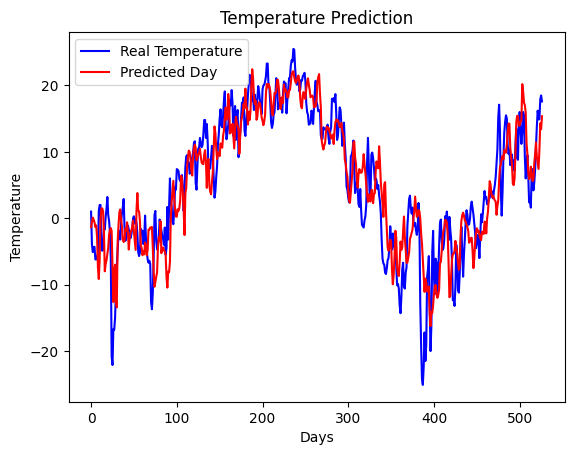

In [29]:
plt.plot(y_test_inverse[:,0, 0], color='blue', label='Real Temperature')

plt.plot(predict_inverse[:,0, 0], color='red', label=f'Predicted Day')

plt.title('Temperature Prediction')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [28]:
for n in range(n_features):
    print(df.columns[n])
    for i in range(10):  # 4 это n_forecast
        mae_day = np.mean(np.abs(y_test_inverse[:, i, n] - predict_inverse[:, i, n]))
        print(f'MAE for Day {i+1}: {mae_day}')
    print("--------------------------")

Среднняя t
MAE for Day 1: 3.7119688202281953
MAE for Day 2: 4.221297918711975
MAE for Day 3: 4.557646127995209
MAE for Day 4: 4.7086587083351
MAE for Day 5: 4.732774423337073
MAE for Day 6: 4.761051442201269
MAE for Day 7: 4.957459169783165
MAE for Day 8: 5.117588201223253
MAE for Day 9: 5.140222483297962
MAE for Day 10: 5.08678522286707
--------------------------
Минимальная t
MAE for Day 1: 3.656351245614564
MAE for Day 2: 4.075223129444828
MAE for Day 3: 4.496004223552104
MAE for Day 4: 4.620722806985284
MAE for Day 5: 4.757939955790083
MAE for Day 6: 4.764030940177544
MAE for Day 7: 4.875296364133679
MAE for Day 8: 4.992689796017599
MAE for Day 9: 4.952516677031254
MAE for Day 10: 4.952844400604943
--------------------------
Максимальная t
MAE for Day 1: 4.169545410209083
MAE for Day 2: 4.63221922814528
MAE for Day 3: 4.9304859864594635
MAE for Day 4: 5.0699807079597266
MAE for Day 5: 5.0499383268188645
MAE for Day 6: 5.167928048043884
MAE for Day 7: 5.414090615562984
MAE for Day 8